In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('National Election India 1977 - 2014.xlsx')
df['Win'] = 0

# Computing the Winners

In [3]:
wonlist=list(df.groupby(['year','pc_name'])['totvotpoll'].idxmax())
df.loc[df.index.isin(wonlist),'Win']= 1

In [4]:
#df

In [5]:
df_winnings=pd.crosstab([df.year, df.cand_sex], df.Win,  margins=True)

In [6]:
df_winnings

Win                0     1    All
year cand_sex                    
1977 F            51    19     70
     M          1849   520   2369
1980 F           115    28    143
     M          3988   498   4486
1984 F           128    43    171
     M          4825   496   5321
1989 F           169    29    198
     M          5461   497   5958
1991 F           291    39    330
     M          7922   492   8414
1996 F           559    40    599
     M         12841   500  13341
1998 F           231    43    274
     M          3969   497   4466
1999 F           236    48    284
     M          3866   492   4358
2004 F           310    45    355
     M          4585   495   5080
2009 F           498    58    556
     M          7032   482   7514
2014 F           606    62    668
     M          7100   478   7578
     O             6     0      6
All            66638  5901  72539

In [7]:
Years = list(pd.unique(df.year)) 
Years

[1977, 1980, 1984, 1989, 1991, 1996, 1998, 1999, 2004, 2009, 2014]

In [8]:
winnerdf2= df.copy()

In [9]:
national_party_df = pd.read_excel('List of Political Parties Participated 2014.xlsx')
national_party_df = national_party_df.fillna(0)
d = {}
for x in Years:
    temp = list(national_party_df[x])
    l = []
    for j in temp:
        if j != 0:
            l.append(j.split(',')[0])
    d[x] = l

In [10]:
d  # Dictonary containing National Parties in a particular year

{1977: ['BLD', 'CPI', 'CPM', 'INC', 'NCO'],
 1980: ['CPI', 'CPM', 'INC(I)', 'INC(U)', 'JNP', 'JNP(S)'],
 1984: ['BJP', 'CPI', 'CPM', 'ICS', 'INC', 'JNP', 'LKD'],
 1989: ['BJP', 'CPI', 'CPM', 'ICS(SCS)', 'INC', 'JD', 'JNP (JP)', 'LKD (B)'],
 1991: ['BJP', 'CPI', 'CPM', 'ICS(SCS)', 'INC', 'JD', 'JD(S)', 'JP', 'LKD'],
 1996: ['AIIC(T)', 'BJP', 'CPI', 'CPM', 'INC', 'JD', 'JP', 'SAP'],
 1998: ['BJP', 'BSP', 'CPI', 'CPM', 'INC', 'JD', 'SAP'],
 1999: ['BJP', 'BSP', 'CPI', 'CPM', 'INC', 'JD(S)', 'JD(U)'],
 2004: ['BJP', 'BSP', 'CPI', 'CPM', 'INC', 'NCP'],
 2009: ['BJP', 'BSP', 'CPI', 'CPM', 'INC', 'NCP', 'RJD'],
 2014: ['BJP', 'BSP', 'CPI', 'CPM', 'INC', 'NCP']}

# Computing the party of the candidate

In [11]:
for year in Years:
    temp=d[year]
    winnerdf2.loc[(winnerdf2.partyabbre.isin(temp)) & (winnerdf2.year == year) , 'party_type'] = 'N'

winnerdf2.loc[winnerdf2.partyabbre=='IND', 'party_type'] = 'I'
winnerdf2["party_type"].fillna("S", inplace = True)

In [12]:
#winnerdf2

In [13]:
temp_women=winnerdf2.copy()

# Performace of Women Region wise in a (National, State, Independet) Party

In [14]:
temp_women = temp_women.replace(['Chhattisgarh','Goa Daman & Diu', 'National Capital Territory Of Delhi', 'Nct Of Delhi','Orissa','Pondicherry','Uttaranchal'], ['Chattisgarh', 'Goa, Daman & Diu', 'Delhi', 'Delhi','Odisha','Puducherry','Uttarakhand'])

south_india=('Andhra Pradesh','Lakshadweep','Andaman & Nicobar Islands','Kerala','Karnataka', 'Pondicherry','Puducherry','Tamil Nadu')
north_india=('Rajasthan','Uttar Pradesh','Haryana','Punjab','Jammu & Kashmir','Delhi','Uttarakhand','Himachal Pradesh','Jharkhand', 'Dadra & Nagar Haveli','Chandigarh')
central_india=('Madhya Pradesh','Chattisgarh')
west_india=('Goa','Daman & Diu','Goa, Daman & Diu', 'Gujarat','Maharashtra')
east_india=('Bihar','Jharkhand','Odisha','Orissa','West Bengal','Arunachal Pradesh','Assam','Nagaland','Manipur', 'Mizoram','Meghalaya','Sikkim', 'Tripura')


In [15]:
temp_women['region']='default'
temp_women['region'].loc[temp_women['st_name'].isin(south_india)]= 'south_india'
temp_women['region'].loc[temp_women['st_name'].isin(north_india)]= 'north_india'
temp_women['region'].loc[temp_women['st_name'].isin(central_india)]= 'central_india'
temp_women['region'].loc[temp_women['st_name'].isin(west_india)]= 'west_india'

temp_women['region'].loc[temp_women['st_name'].isin(east_india)]= 'east_india'
df = df.replace(['Chhattisgarh','Goa Daman & Diu', 'National Capital Territory Of Delhi', 'Nct Of Delhi','Orissa','Pondicherry','Uttaranchal'], ['Chattisgarh', 'Goa, Daman & Diu', 'Delhi', 'Delhi','Odisha','Puducherry','Uttarakhand'])

/Users/mju/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [16]:
data_df=temp_women[['st_name','year','cand_sex','Win','party_type','region']]
data_df = data_df[(data_df['cand_sex'] == 'F') & (data_df['Win']==1)]
data_df
df_region=pd.crosstab([data_df.year,data_df.region],data_df["party_type"],margins=True)
df_region
#df_region.to_excel(r'C:\Users\ATUL SHARMA\Downloads\Political Parties\region.xlsx')

party_type          I    N   S  All
year region                        
1977 east_india     0    4   1    5
     north_india    0    5   1    6
     south_india    0    4   0    4
     west_india     0    4   0    4
1980 central_india  0    3   0    3
     east_india     0    7   0    7
     north_india    0   10   0   10
     south_india    0    4   0    4
     west_india     0    3   1    4
1984 central_india  0    2   0    2
     east_india     0   15   0   15
     north_india    0   14   1   15
     south_india    0    4   2    6
     west_india     0    5   0    5
1989 central_india  0    3   0    3
     east_india     0    5   0    5
     north_india    0    7   3   10
     south_india    0    9   0    9
     west_india     0    2   0    2
1991 central_india  0    5   0    5
     east_india     0    8   1    9
     north_india    0   10   0   10
     south_india    0    9   1   10
     west_india     0    5   0    5
1996 central_india  0    5   0    5
     east_india     0    9   1   10
     north_india    0   15   2   17
     south_india    0    3   1    4
     west_india     0    4   0    4
1998 central_india  0    4   0    4
     east_india     0    9   4   13
     north_india    1   10   5   16
     south_india    0    2   2    4
     west_india     0    6   0    6
1999 central_india  0    3   0    3
     east_india     0   10   3   13
     north_india    1   12   4   17
     south_india    0    4   4    8
     west_india     0    5   2    7
2004 central_india  0    3   0    3
     east_india     0    6   4   10
     north_india    0    9   6   15
     south_india    0    8   3   11
     west_india     0    4   2    6
2009 central_india  0    8   0    8
     east_india     0    8   6   14
     north_india    0   16   6   22
     south_india    0    5   2    7
     west_india     0    6   1    7
2014 central_india  0    6   0    6
     east_india     0    5  14   19
     north_india    0   15   4   19
     south_india    0    2   7    9
     west_india     0    8   1    9
All                 2  357  95  454

# Visualization of Winning women parties 

In [17]:
final_dic_year = {}
for x in Years:
    Indep=[]
    national=[]
    state=[]

    df_participation_female = winnerdf2[(winnerdf2['cand_sex'] == 'F') & (winnerdf2['year']==x)]
    df_won_female =  winnerdf2[(winnerdf2['cand_sex'] == 'F') & (winnerdf2['Win']==1) & (winnerdf2['year']==x)]
    d1_f_won = dict(df_won_female['party_type'].value_counts())
    d2_f_part = dict(df_participation_female['party_type'].value_counts())
    if 'I' not in d1_f_won.keys():
        d1_f_won['I'] = 0
    #print (d1_f_won,d2_f_part)

    national.append((d1_f_won['N']/d2_f_part['N'])*100)   #National
    state.append((d1_f_won['S']/d2_f_part['S'])*100)   #state
    Indep.append((d1_f_won['I']/d2_f_part['I'])*100)   #Independent

    final_dic_year[x] = national+state+Indep

#print ("Percentage of National,State,Independent Winning women")
#final_dic_year

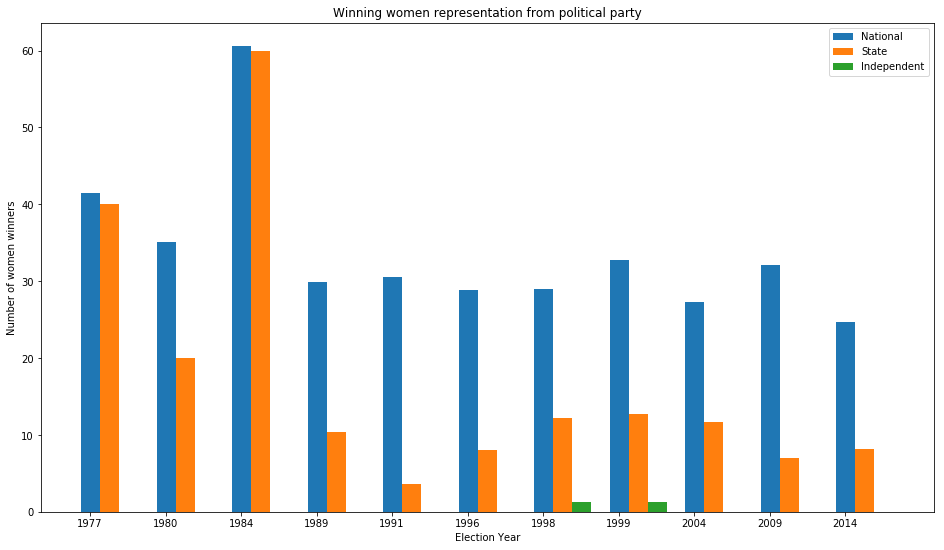

In [18]:
Indep=[]
national=[]
state=[]
for x in final_dic_year.values():
    national.append(x[0])
    state.append(x[1])
    Indep.append(x[2])

plt.rcParams["figure.figsize"] = [16,9]

party_type=Years

xpos = np.arange(len(Years))

plt.bar(xpos+0.010,national, width=0.25, label="National")
plt.bar(xpos+0.26,state, width=0.25,label="State")
plt.bar(xpos+0.51,Indep, width=0.25,label="Independent")

plt.xticks(xpos,Years)
plt.ylabel("Number of women winners")
plt.title('Winning women representation from political party')
plt.xlabel('Election Year')
plt.legend()
plt.show()

# Performance of Women in Election Seats

In [19]:
x = winnerdf2.loc[winnerdf2['cand_sex'] == 'F']
x['cand_sex'] = 1                                               #Female candidates
z = x.groupby(['year']).sum()                                   #Calculating number of females           

/Users/mju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
z = z.drop(['pc_no','totvotpoll','electors'], axis=1)                 # Columns not required
z['seats'] = [542,542,514,529,407,543,543,543,543,543,543]            # Total Number of seats per year
z['Pwin']=round((z['Win']/z['seats'])*100,2)
z['Plose']=100-z['Pwin']
z["years"] = list(z.index)
z

,cand_sex,Win,seats,Pwin,Plose,years
year,,,,,,
1977,70,19,542,3.51,96.49,1977
1980,143,28,542,5.17,94.83,1980
1984,171,43,514,8.37,91.63,1984
1989,198,29,529,5.48,94.52,1989
1991,330,39,407,9.58,90.42,1991
1996,599,40,543,7.37,92.63,1996
1998,274,43,543,7.92,92.08,1998
1999,284,48,543,8.84,91.16,1999
2004,355,45,543,8.29,91.71,2004


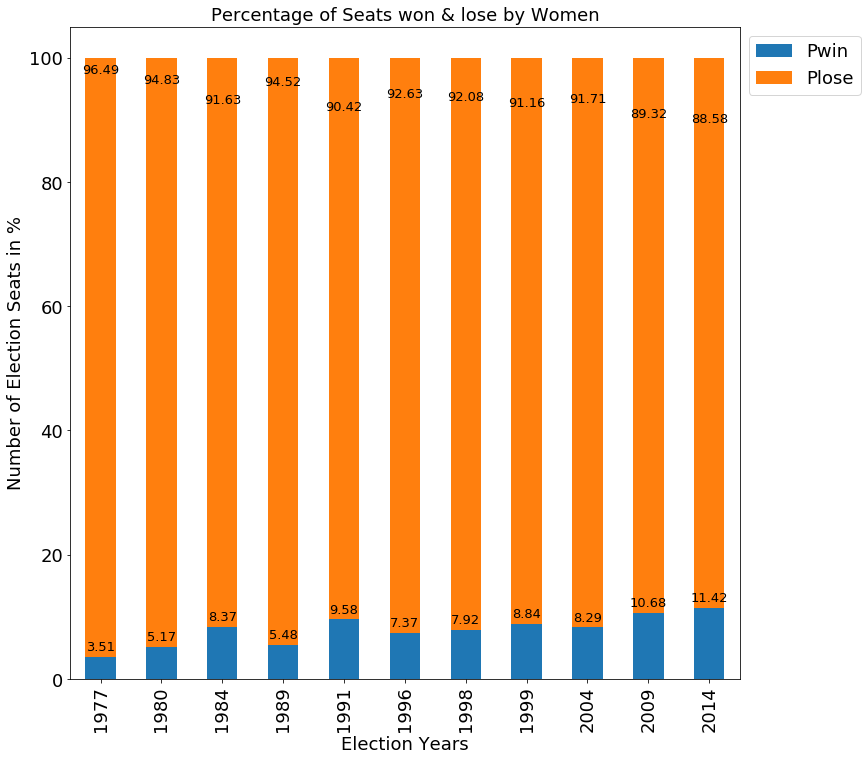

In [21]:
df2 = z.groupby(['years'])[['Pwin','Plose']].sum().plot(kind='bar', stacked=True, figsize=(12,12) , fontsize=18)
df2.set_ylabel('Number of Election Seats in %', fontsize=18)
df2.set_xlabel('Election Years', fontsize=18)
df2.set_title('Percentage of Seats won & lose by Women', fontsize=18)
df2.legend(bbox_to_anchor=(1, 1), fontsize=18)

for p in df2.patches:
    df2.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), fontsize=13, textcoords='offset points')

